106. Construct Binary Tree from Inorder and Postorder Traversal

Given two integer arrays inorder and postorder where inorder is the inorder traversal of a binary tree and postorder is the postorder traversal of the same tree, construct and return the binary tree.

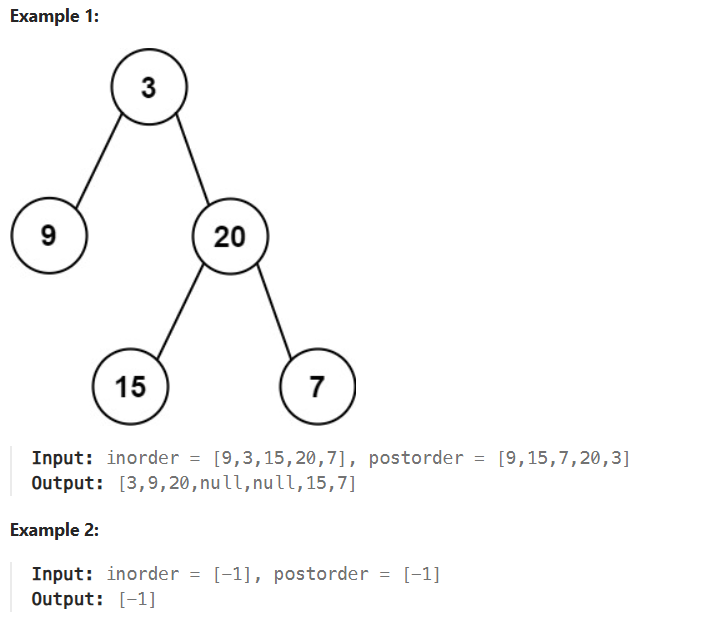

In [23]:
class Solution(object):
    def buildTree(self, inorder, postorder):
        if len(postorder) == 0:
            return None

        head_val = postorder[-1]
        tree = TreeNode(head_val)

        head_idx_inorder = inorder.index(head_val)

        left_tree_inorder = inorder[:head_idx_inorder]
        right_tree_inorder = inorder[head_idx_inorder + 1 :]
        # len_left_tree = len(left_tree_inorder)

        postorder_left = postorder[: head_idx_inorder]
        postorder_right = postorder[head_idx_inorder : -1]

        # print('head', head_val)
        # print('inorders', left_tree_inorder, right_tree_inorder)
        # print('postorders', postorder_left, postorder_right)
        # print()

        tree.left = self.buildTree(left_tree_inorder, postorder_left)
        tree.right = self.buildTree(right_tree_inorder, postorder_right)

        return tree

In [1]:
inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]

In [2]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [3]:
# Idea

# what we have
# postorder = [a,b,c,d,e,head],                  inorder = [left_subtree_elems, head, right_subtree_elems]

# what we prepare  for recursion:
# postorder_left = [ : len(left_subtree_elems)]          inorder_left = [left_subtree_elems], 
# postorder_right = [len(left_subtree_elems) : -1]       inorder_right = [right_subtree_elems]

In [11]:
# Development

In [6]:
def build_tree_postorder_inorder(inorder, postorder):
    if len(postorder) == 0:
        return None

    # print('inorder', inorder, 'postorder', postorder)
    head_val = postorder[-1]
    tree = TreeNode(head_val)

    head_idx_inorder = inorder.index(head_val)

    left_tree_inorder = inorder[:head_idx_inorder]
    right_tree_inorder = inorder[head_idx_inorder + 1 :]
    

    postorder_left = postorder[: head_idx_inorder]
    postorder_right = postorder[head_idx_inorder : -1]

    # print('head', head_val)
    # print('inorders', left_tree_inorder, right_tree_inorder)
    # print('postorders', postorder_left, postorder_right)
    # print()

    tree.left = build_tree_postorder_inorder(left_tree_inorder, postorder_left)
    tree.right = build_tree_postorder_inorder(right_tree_inorder, postorder_right)

    return tree

tree = build_tree_postorder_inorder(inorder, postorder)    
tree

In [8]:
# Help function make list representation from tree by levels
from collections import deque

def traversal_by_levels(tree):
    if not tree:
        return []

    res_list = []
    q = deque()
    q.append(tree)
    res_list.append(tree.val)

    while q:
        node = q.popleft()
        # res_list.append(node.val)

        if node.left:
            res_list.append(node.left.val)
            q.append(node.left)

        else:
            res_list.append('null')

        if node.right:
            res_list.append(node.right.val)
            q.append(node.right)

        else:
            res_list.append('null')

    return res_list
        
traversal_by_levels(tree)    

[3, 9, 20, 'null', 'null', 15, 7, 'null', 'null', 'null', 'null']

In [9]:
def inorder_traversal(tree):
    if not tree:
        return []

    return inorder_traversal(tree.left) + [tree.val] + inorder_traversal(tree.right)

inorder_traversal(tree)

[9, 3, 15, 20, 7]

In [10]:
def postorder_traversal(tree):
    if not tree:
        return []

    return postorder_traversal(tree.left) + postorder_traversal(tree.right) + [tree.val]

postorder_traversal(tree)

[9, 15, 7, 20, 3]